<a href="https://colab.research.google.com/github/ilhamsyah183/Machine-Learning-Documentation/blob/main/Pneumonia%20With%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile,os
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
import cv2
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv

In [ ]:
local_zip = '/content/drive/MyDrive/Datasets Submisions/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/dataset2')
zip_ref.close()

In [ ]:
data = "/content/dataset2/chest_xray/test"
kategori = ["NORMAL","PNEUMONIA"]

In [ ]:
img_size = 224

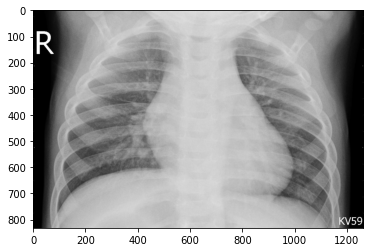

In [ ]:
for category in kategori:
    path=os.path.join(data, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [ ]:
print(len(dataAll))

624


In [ ]:
lendata = len(dataAll)

In [ ]:
X_train=[]
y_train=[]

for categories, label in dataAll:
    X_train.append(categories)
    y_train.append(label)
X= np.array(X_train).reshape(lendata,-1)

In [ ]:
type(y_train)
X_train[1]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
X.shape

(624, 150528)

In [ ]:
print(X.shape)

(624, 150528)


In [ ]:
X = X/255.0

In [ ]:
y=np.array(y_train)
type(y_train)


list

In [ ]:
#Ini tempat untuk membuat skema pengujian jika test_size = 0.4 maka data uji 40% dan data latih 60%
#ubah-ubah saja value dari parameter test_size untuk mendapat skema yang berbeda

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid',gamma='auto',max_iter=300,random_state=42, C=1000.0,verbose= True )
svc.fit(X_train, y_train)

[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=300, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=True)

In [ ]:
y2 = svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy data :",accuracy_score(y_test,y2))

Accuracy data : 0.892


In [ ]:
from sklearn.metrics import classification_report
print("Accuracy report :",classification_report(y_test,y2))

Accuracy report :               precision    recall  f1-score   support

           0       0.87      0.79      0.83        94
           1       0.88      0.93      0.90       156

    accuracy                           0.88       250
   macro avg       0.87      0.86      0.87       250
weighted avg       0.88      0.88      0.87       250



In [ ]:
import pandas as pd
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [ ]:
result

,original,predicted
0,1,1
1,1,0
2,0,0
3,0,0
4,1,1
...,...,...
245,1,1
246,1,1
247,1,1
248,1,1


In [ ]:
result.to_excel("hasil.xlsx")

In [ ]:
# from skimage.color import rgb2hsv, rgb2gray, rgb2yuv

# ex_img = cv2.imread("/content/dataset2/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg")
# ex_img = rgb2yuv(ex_img)
# plt.imshow(ex_img)
# plt.show()
